In [103]:
import random
import csv

In [104]:
def read_csv(file_path):
    with open(file_path, mode="r", encoding="utf-8") as file:
        reader = csv.reader(file)
        data = [row for row in reader]
    return data

In [105]:
def normalize_number_list(number_list):
    min_value = min(number_list)
    number_list = [i-min_value for i in number_list]
    multiply_factor = 220
    left_adjustment = 30
    number_list = [left_adjustment+(i*multiply_factor) for i in number_list]
    print(number_list)
    return number_list


In [106]:
def get_random_point_list_from_csv(target_csv):
    content = random.choice(read_csv(target_csv))
    content = [float(i) for i in content]
    content = content[1:]
    content = normalize_number_list(content)
    points = []
    for i in range(0,len(content),2):
        x = content[i]
        y = content[i+1]
        point = (x,y)
        points.append(point)
        if i + 2 == len(content):
            break

    return points

In [107]:
import cv2
import numpy
import matplotlib.pyplot as plt


def draw_points_on_canvas(points):
    base_image = numpy.zeros((300, 300, 3), dtype=numpy.uint8)
    start_green_color = 255
    end_green_color = 0
    green_color_step = (end_green_color - start_green_color) / len(points)
    start_red_color = 0
    end_red_color = 255
    red_color_step = (end_red_color - start_red_color) / len(points)

    green_color = start_green_color
    red_color = start_red_color
    for point in points:
        x, y = int(point[0]), int(point[1])
        cv2.circle(base_image, (x, y), 1, (int(red_color), int(green_color), 0), -1)
        green_color += green_color_step
        red_color += red_color_step

    #add some text to the plot
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    font_color = (255, 255, 255)
    font_thickness = 1
    text = "red = new"
    text_size = cv2.getTextSize(text, font, font_scale, font_thickness)[0]
    text_x = int((base_image.shape[1] - text_size[0]) / 2)
    text_y = base_image.shape[1] - 30
    cv2.putText(base_image, text, (text_x, text_y), font, font_scale, font_color, font_thickness)

    plt.imshow(base_image)
    plt.show()


def show_random_datum(csv_path,label):
    print('='*50)
    print(label)
    points = get_random_point_list_from_csv(csv_path)
    draw_points_on_canvas(points)

C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\point_history_cw.csv
[48.7407407, 48.7407407, 44.84490744, 48.7407407, 42.5532407, 49.555555580000004, 40.71990744, 44.66666652, 39.34490744, 41.0, 40.03240744, 37.740740699999996, 40.4907407, 34.4814814, 42.09490744, 31.629629539999996, 44.615740699999996, 30.40740744, 47.365740699999996, 30.0, 49.88657396, 31.222222099999996, 52.1782407, 32.85185186, 54.240740699999996, 34.07407396, 55.6157407, 36.92592582, 56.53240744, 40.18518512, 56.53240744, 43.85185186]


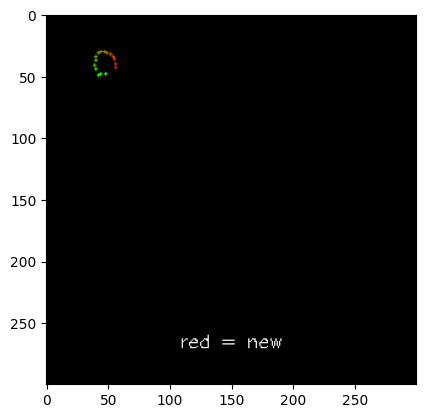

C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\diverse_synthetic_ccw_2.csv
[89.25812884615138, 65.76590216420209, 70.31958087493342, 64.43608038119197, 68.87141841791873, 73.49567402102596, 54.498773848838525, 70.50436324762963, 44.00753338081606, 75.16056370407463, 35.47825512513593, 88.05299806915136, 36.11337888595568, 85.21933974969824, 32.65284942310451, 93.57192153901896, 35.555995620404374, 113.85895828244284, 41.200038207271874, 117.85716288221967, 37.259384994132176, 126.86619655217336, 30.0, 120.62807811652563, 35.43638089187161, 136.2815008275886, 42.72220859709701, 124.02687237269049, 63.71035496207691, 147.215362856323, 66.4011214538084, 138.82988381088904]


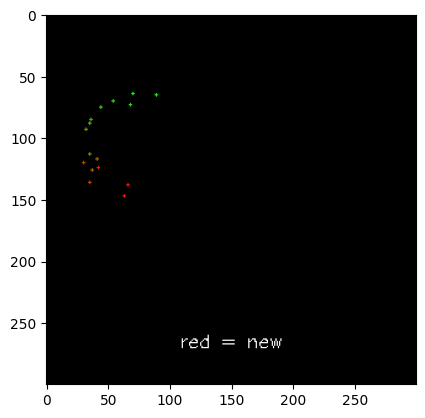

C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\synthetic_ccw_2.csv
[127.04541705156416, 74.7904622477467, 127.37791488527142, 65.88004925129599, 115.35780977359754, 57.33806537744545, 94.67300946831992, 53.15462676627001, 70.64555539520401, 53.29739707467177, 47.237596698282836, 55.855805765804966, 34.679819543078395, 63.83122843971699, 30.0, 72.06453174365805, 40.71023034618848, 77.39147321708487, 57.28603628706894, 84.18290830140921, 83.20711197236162, 86.95868455638401, 106.21174840482377, 84.38417685999525, 121.9654121074922, 76.60893725688695, 129.21376006093004, 68.44426560804507, 120.64674126101245, 60.77082491413361, 104.19177369650615, 54.87625355177762]


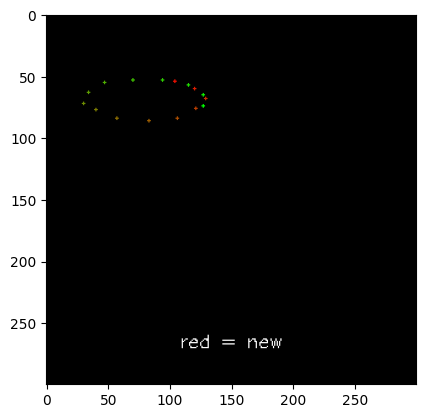

C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\point_history_Big_ccw_2.csv
[57.84375, 57.84375, 54.921875, 56.92708333333333, 51.140625, 59.06597222222222, 46.328125, 57.232638888888886, 40.65625, 57.232638888888886, 36.359375, 59.67708333333333, 33.09375, 63.03819444444444, 30.859375, 68.53819444444444, 30.0, 74.64930555555556, 30.171874999999996, 80.14930555555556, 31.375, 85.95486111111111, 34.125, 90.53819444444444, 38.421875, 95.42708333333333, 42.546875, 99.39930555555556, 47.015625, 102.14930555555554, 51.65625, 102.14930555555554]


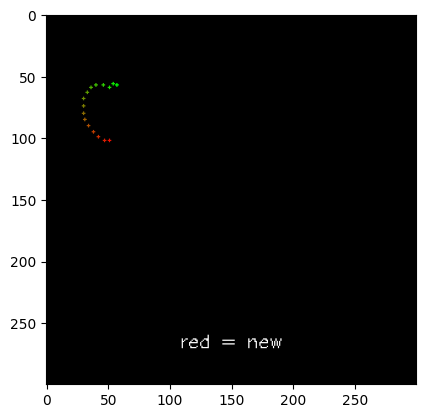

C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\point_history_big3cut_3_cw_cut_to_1000_.csv
[66.66666666666666, 66.66666666666666, 61.68229166666667, 68.80555555555554, 58.072916666666664, 67.27777777777777, 54.807291666666664, 64.52777777777777, 53.260416666666664, 58.722222222222214, 53.260416666666664, 52.0, 54.635416666666664, 44.97222222222222, 56.697916666666664, 39.166666666666664, 59.61979166666667, 34.27777777777777, 63.401041666666664, 30.916666666666664, 66.83854166666666, 30.0, 70.27604166666666, 31.222222222222218, 72.85416666666666, 33.666666666666664, 75.94791666666667, 38.24999999999999, 77.32291666666666, 44.666666666666664, 77.15104166666666, 50.47222222222222]


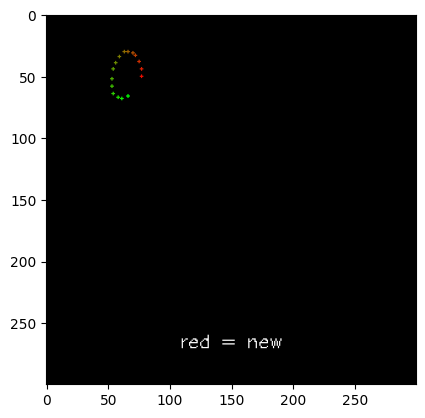

C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\synthetic_cw_1.csv
[102.7620861959426, 85.54552806770069, 95.3454096171536, 89.04475183636995, 86.52935677023552, 89.99096876488363, 76.37937843842704, 91.61852631675316, 64.85884406048334, 90.44746120546603, 55.22599888816397, 91.57685608354024, 46.734039866436945, 89.4456003506579, 39.04005689419465, 86.71741938975177, 33.75406208324446, 84.28756441660238, 30.419136074247817, 79.1304405988859, 30.0, 76.36939988419915, 33.83164613224088, 73.18823491777056, 37.35728143562356, 70.6407598955699, 46.13311745750515, 66.36766588840177, 55.82392511633684, 66.10525090906017, 66.19601838011312, 64.46738176283722]


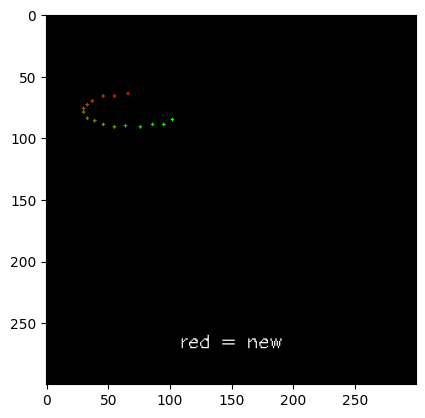

C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\point_history_big3cut_2_ccw_cut_to_1000_.csv
[171.7777777777778, 171.7777777777778, 170.7465277777778, 162.00000000000003, 167.8246527777778, 148.25, 78.79340277777779, 30.0, 78.79340277777779, 30.0, 78.79340277777779, 30.0, 141.52777777777777, 159.86111111111111, 141.52777777777777, 173.91666666666666, 145.8246527777778, 184.61111111111111, 156.82465277777777, 200.19444444444446, 167.13715277777777, 180.63888888888889, 169.71527777777777, 166.58333333333334, 170.9184027777778, 151.0, 167.4809027777778, 142.75, 78.79340277777779, 30.0, 78.79340277777779, 30.0]


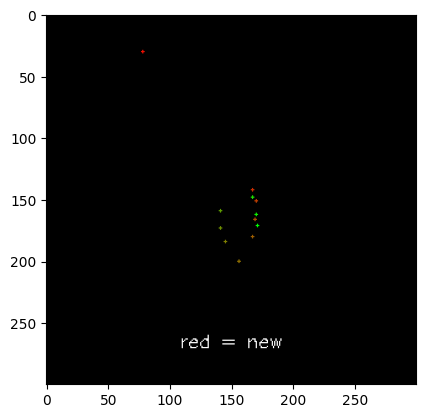

C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\point_history_big2_2_ccw.csv
[59.02777777777778, 59.02777777777778, 61.09027777777778, 68.19444444444444, 64.01215277777777, 74.91666666666666, 68.82465277777777, 79.19444444444444, 73.98090277777777, 79.5, 77.93402777777777, 76.13888888888889, 83.09027777777777, 71.55555555555556, 84.98090277777777, 62.38888888888889, 86.52777777777777, 52.611111111111114, 86.52777777777777, 45.888888888888886, 84.98090277777777, 39.16666666666667, 82.57465277777777, 33.97222222222222, 78.44965277777777, 30.0, 74.49652777777777, 30.0, 69.51215277777777, 35.19444444444444, 65.73090277777777, 38.861111111111114]


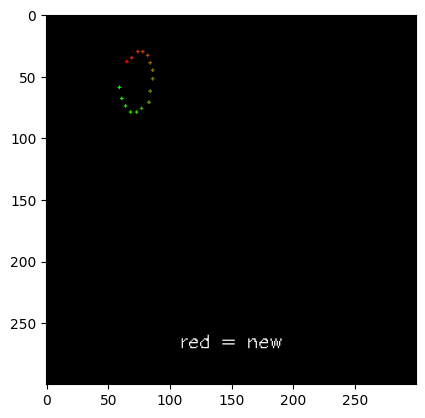

C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\diverse_synthetic_cw_1.csv
[134.00405293784672, 114.70448348621386, 106.72557183242436, 136.0718747966707, 102.68400850787037, 137.32851041686814, 104.04265134205485, 145.61257973863457, 84.7514203973274, 140.4258305309454, 81.90265943816274, 149.29884553866611, 57.80378711697517, 120.69085274559947, 65.39532008952045, 122.39510988439558, 60.24341118294434, 108.88647254470895, 49.94091043123342, 84.39424643276047, 59.67976164073863, 71.19471827914143, 57.71615368107976, 44.48001399058758, 68.01732029458097, 36.097775589866316, 88.37402198619557, 30.0, 98.14170720543137, 34.254801736724744, 110.93520965700091, 41.03548319277682]


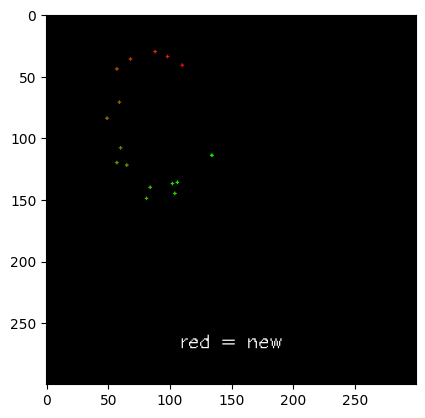

C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\point_history_big2_3_cw.csv
[190.703125, 190.703125, 194.3125, 194.36979166666669, 197.234375, 202.00868055555557, 198.953125, 215.453125, 197.75, 223.703125, 30.0, 121.953125, 178.328125, 224.92534722222223, 175.234375, 216.36979166666669, 175.0625, 212.39756944444443, 175.0625, 205.98090277777777, 176.953125, 198.34201388888889, 180.046875, 192.23090277777777, 184.0, 188.25868055555557, 188.125, 188.25868055555557, 192.421875, 190.09201388888889, 197.234375, 194.9809027777778]


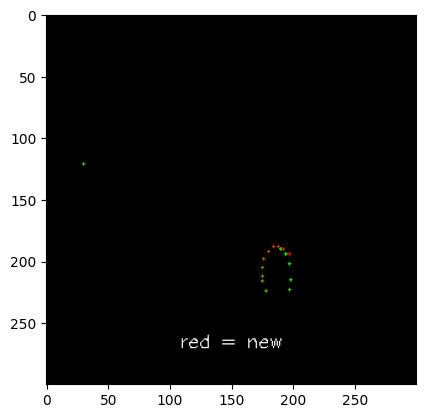

C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\point_history_ccw.csv
[51.3125, 51.3125, 48.046875, 45.201388888888886, 43.921875, 38.173611111111114, 41.859375, 39.395833333333336, 39.796875, 37.86805555555556, 34.640625, 39.09027777777778, 30.171875, 40.61805555555556, 30.0, 45.201388888888886, 30.0, 50.09027777777778, 31.546875, 55.89583333333333, 34.125, 61.39583333333333, 37.046875, 67.20138888888889, 39.96875, 70.5625, 43.578125, 71.47916666666666, 47.015625, 74.53472222222223, 49.078125, 73.00694444444444]


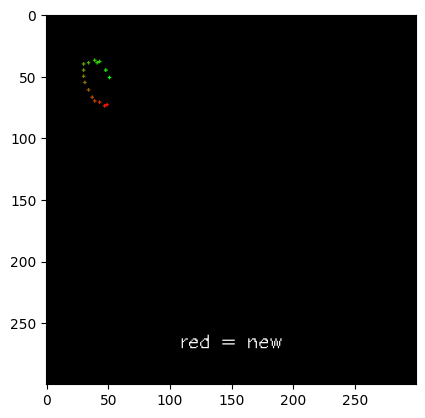

In [108]:
csv_paths = {
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\diverse_synthetic_ccw_2.csv",
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\synthetic_ccw_2.csv",
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\diverse_synthetic_cw_1.csv",
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\synthetic_cw_1.csv",
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\point_history_Big_ccw_2.csv",
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\point_history_big2_2_ccw.csv",
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\point_history_big2_3_cw.csv",
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\point_history_big3cut_3_cw_cut_to_1000_.csv",
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\point_history_big3cut_2_ccw_cut_to_1000_.csv",
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\point_history_ccw.csv",
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\point_history_cw.csv",
}

for csv_path in csv_paths:
    show_random_datum(csv_path, csv_path)